# Assignment 6: Feature Engineering
Feature Engineering Snail Size\
Ismail Abdo Elmaliki\
CS 502 - Predictive Analytics\
Capitol Technology University\
Professor Frank Neugebauer\
February 8, 2022

## Data Understanding
It's important to understand the existing data at a high level before moving forward with feature engineering.\
Hence we'll need to know the following first:
- Number of entries
- Number of missing values
- Distribution - whether it's normally distributed, left skewed or right skewed
- Data description - including std, max, and min values

### info() & head()
Out of 4177 entries, the following columns have missing values:
- length
- diameter
- shell_weight

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import math

df = pd.read_excel('snail_size.xlsx')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4177 non-null   object 
 1   length           4163 non-null   float64
 2   diameter         4163 non-null   float64
 3   height           4177 non-null   float64
 4   full_weight      4177 non-null   float64
 5   no_shell_weight  4177 non-null   float64
 6   core_weight      4177 non-null   float64
 7   shell_weight     4147 non-null   float64
 8   age              4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


,gender,length,diameter,height,full_weight,no_shell_weight,core_weight,shell_weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,NaN,10
4,Infant,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Describe
The standard deviation among all values seem close except for **age** and **height**.\
Also it looks like there are outliers in **height**, with the minimum value being 0 and the maximum value being 165.\
Outliers also seem to exist in **age**, with the min value being 1 and the maximum value being 29.

In [15]:
df.describe()

,length,diameter,height,full_weight,no_shell_weight,core_weight,shell_weight,age
count,4163.000000,4163.000000,4177.000000,4177.000000,4177.000000,4177.000000,4147.000000,4177.000000
mean,0.524042,0.407871,0.219368,0.828742,0.359367,0.180594,0.239078,9.933684
std,0.120100,0.099266,3.506068,0.490389,0.221963,0.109614,0.139089,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.235000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329750,11.000000
max,0.815000,0.650000,165.000000,2.825500,1.488000,0.760000,1.005000,29.000000


### Skew & Histogram
https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de
With analyzing results of the `skew()` pandas function, we have to keep the following in mind (Dan, 2020):
- Skewness between -0.5 and 0.5 means it's fairly symmetrical
- Skewness between -1 and -0.5 or between 0.5 and 1 means data is moderately skewed
- Skewness less than -1 or greater than 1 means data is highly skewed 

Based on the histogram chart and skewness for all features, here are the following observations:
- **length** moderately left skewed
- **diameter** moderately left skewed
- **height** highly right skewed
- **full_weight** moderately right skewed
- **no_shell_weight** moderately right skewed
- **core_weight** moderately right skewed
- **shell_weight** moderately right skewed
- **age** highly right skewed

/var/folders/h8/gz6p2r657dbgvclv0p0zxy180000gn/T/ipykernel_41324/2526089970.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


length             -0.640581
diameter           -0.609110
height             45.498975
full_weight         0.530959
no_shell_weight     0.719098
core_weight         0.591852
shell_weight        0.617831
age                 1.114102
dtype: float64

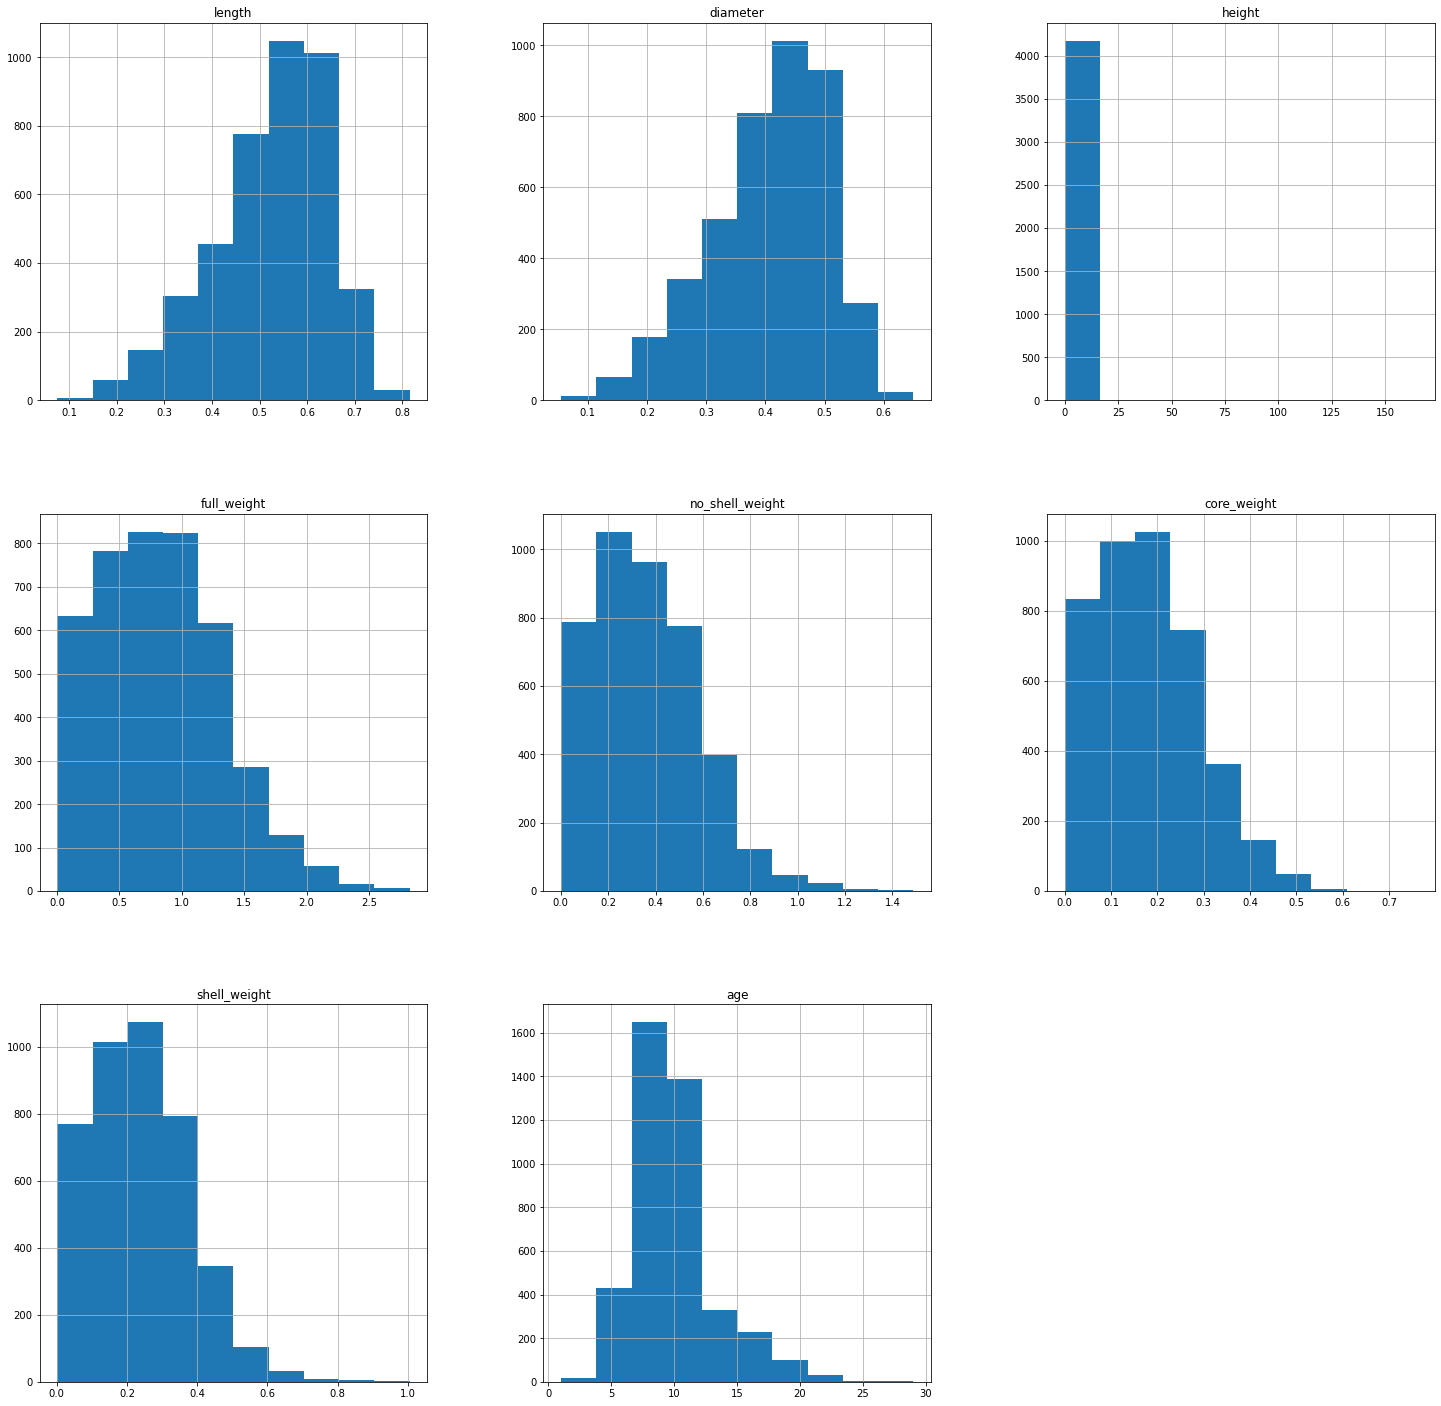

In [16]:
df.hist(figsize=(25, 25))
df.skew()

### Mispelled Data
Looks like the **gender** column contains a typo with `Instant` when it should be `Infant`

In [17]:
df['gender'].unique()

array(['M', 'F', 'Infant', 'Instant'], dtype=object)

## Feature Engineering
Based on data understanding so far, here's the following that will need to be addressed:
- Address **gender** value typo, change `Instant` to `Infant`
- Encode **gender** feature then analyze its skewness and determine if it needs further manipulation
- Fill missing values for **length**, **diameter**, and **shell_weight**
- Address skewness for numerical features

### Address **gender** value typo
Here we'll replace of values of `Instant` with `Infant`

In [18]:
updated_df = df.copy()
updated_df['gender'].replace('Instant', 'Infant', regex=True, inplace=True)
updated_df['gender'].unique()

array(['M', 'F', 'Infant'], dtype=object)

### One Hot Encoding for **gender** feature
Because **gender** is a non ordinal category, it's best to go with one hot encoding since there are only 3 unique values: `M`, `F`, and `Infant`

In [19]:
updated_df = pd.get_dummies(updated_df, columns=['gender'], prefix='gender')
updated_df.head()

,length,diameter,height,full_weight,no_shell_weight,core_weight,shell_weight,age,gender_F,gender_Infant,gender_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,NaN,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


### Analyze Skewness for **gender_F** , **gender_M** , **gender_Infant**
With analyzing `skew()` for gender columns, here's what we have:
- **gender_F**: is moderately right skewed
- **gender_M**: is moderately right skewed
- **gender_Infant**: is moderately right skewed

From this analysis, we can conclude we'll need to apply numerical transformations to all gender columns for an even distribution.

In [32]:
updated_df.skew()

length             -0.640581
diameter           -0.609110
height             45.498975
full_weight         0.530959
no_shell_weight     0.719098
core_weight         0.591852
shell_weight        0.617831
age                 1.114102
gender_F            0.807302
gender_Infant       0.765708
gender_M            0.557390
dtype: float64